In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
beauty_df = pd.read_csv(r"C:\Users\pc\Downloads\most_used_beauty_cosmetics_products_extended.csv")

In [5]:
beauty_df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


In [7]:
beauty_df.tail()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
14995,Magic Eyeliner,Patrick Ta,Face Mask,Daily,131.64,2.8,1470,250ml,Sensitive,Unisex,Tube,Aloe Vera,True,Italy
14996,Perfect Powder,Farsali,Serum,Weekly,76.35,2.1,7652,250ml,Dry,Unisex,Jar,Salicylic Acid,True,USA
14997,Magic Serum,Kiehl’s,Highlighter,Occasional,65.37,4.2,811,30ml,Combination,Unisex,Jar,Shea Butter,False,South Korea
14998,Magic Mascara,Perricone MD,Powder,Weekly,59.93,4.8,5482,250ml,Dry,Male,Jar,Aloe Vera,True,USA
14999,Divine Lip Liner,Tatcha,Blush,Daily,36.96,1.1,5452,200ml,Normal,Female,Bottle,Shea Butter,False,UK


In [9]:
beauty_df.shape

(15000, 14)

In [11]:
beauty_df.dtypes

Product_Name          object
Brand                 object
Category              object
Usage_Frequency       object
Price_USD            float64
Rating               float64
Number_of_Reviews      int64
Product_Size          object
Skin_Type             object
Gender_Target         object
Packaging_Type        object
Main_Ingredient       object
Cruelty_Free            bool
Country_of_Origin     object
dtype: object

In [13]:
beauty_df.columns

Index(['Product_Name', 'Brand', 'Category', 'Usage_Frequency', 'Price_USD',
       'Rating', 'Number_of_Reviews', 'Product_Size', 'Skin_Type',
       'Gender_Target', 'Packaging_Type', 'Main_Ingredient', 'Cruelty_Free',
       'Country_of_Origin'],
      dtype='object')

In [15]:
beauty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


# Data Cleaning

## Standadizing Columns

In [19]:
beauty_df.columns = beauty_df.columns.str.strip().str.lower()


In [21]:
beauty_df.columns

Index(['product_name', 'brand', 'category', 'usage_frequency', 'price_usd',
       'rating', 'number_of_reviews', 'product_size', 'skin_type',
       'gender_target', 'packaging_type', 'main_ingredient', 'cruelty_free',
       'country_of_origin'],
      dtype='object')

## Data Types Changes

In [24]:
beauty_df["usage_frequency"] = beauty_df["usage_frequency"].astype("category")
beauty_df["product_size_num"] = beauty_df["product_size"].str.extract(r'(\d+\.?\d*)').astype(float)
beauty_df["product_size_unit"] = beauty_df["product_size"].str.extract(r'([a-zA-Z]+)')
beauty_df["gender_target"] = beauty_df["gender_target"].astype("category")

In [25]:
beauty_df.dtypes

product_name           object
brand                  object
category               object
usage_frequency      category
price_usd             float64
rating                float64
number_of_reviews       int64
product_size           object
skin_type              object
gender_target        category
packaging_type         object
main_ingredient        object
cruelty_free             bool
country_of_origin      object
product_size_num      float64
product_size_unit      object
dtype: object

In [28]:
beauty_df.shape

(15000, 16)

#### -  Extracted the numerical part of product size and stored it as a separate column for easier comparison of product sizes and visualization.

## Missing Values

In [32]:
beauty_df.isnull().sum()

product_name         0
brand                0
category             0
usage_frequency      0
price_usd            0
rating               0
number_of_reviews    0
product_size         0
skin_type            0
gender_target        0
packaging_type       0
main_ingredient      0
cruelty_free         0
country_of_origin    0
product_size_num     0
product_size_unit    0
dtype: int64

## Duplicates

In [35]:
beauty_df.duplicated().sum()

0

# EDA

## Descriptive Statistics

In [39]:
beauty_df.describe()

,price_usd,rating,number_of_reviews,product_size_num
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,80.134108,3.002327,5014.231333,129.233333
std,40.402983,1.168029,2855.665464,78.544405
min,10.000000,1.000000,52.000000,30.000000
25%,45.480000,2.000000,2562.000000,50.000000
50%,80.040000,3.000000,5002.000000,100.000000
75%,114.760000,4.000000,7497.000000,200.000000
max,149.990000,5.000000,10000.000000,250.000000


#### - Price in USD: The average price is approximately 80.13 dollars, with prices ranging from 10 dollars to 149.99 dollars. There is a moderate variability in prices, as indicated by the standard deviation of $40.40.

#### - Rating: The average rating of these products is 3.00, with a minimum rating of 1 and a maximum rating of 5. This suggests that the products have a diverse range of customer satisfaction.

#### - Number of Reviews: The average product has received around 5014 reviews, with the number of reviews ranging from 52 to 10,000. This indicates that the products in the dataset are generally well-reviewed.

## Distribution of Price, Rating & Number of reviews 

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


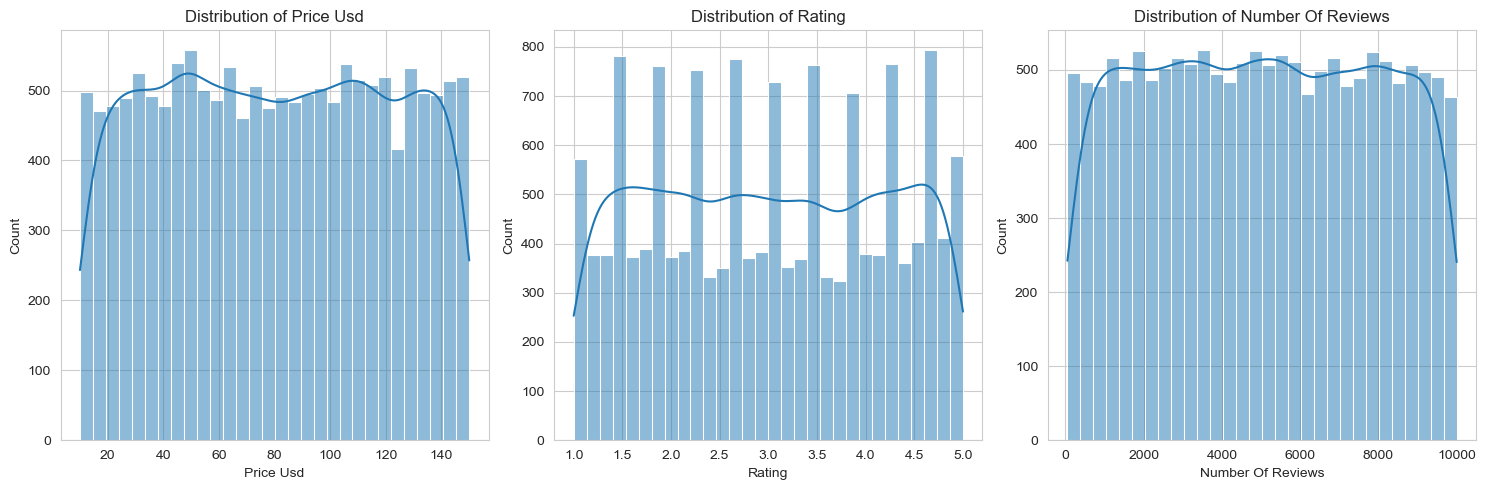

In [43]:
sns.set_style("whitegrid")

numeric_cols = ["price_usd", "rating", "number_of_reviews"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    sns.histplot(beauty_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


#### - The price distribution is quite varied, with a wide range of prices observed. Most products are clustered within the lower price range, indicating that many beauty products are relatively affordable.

#### - The ratings distribution shows that most products receive a rating around the mid-point, suggesting a moderate level of customer satisfaction overall. There are fewer products at the extreme ends of the rating scale.

#### - The number of reviews distribution reveals that the majority of products have a moderate number of reviews, with fewer products having either very high or very low numbers of reviews. This suggests a diverse level of customer engagement and interest across the product range.

## Correlation Coefficient between price and rating

In [46]:
correlation = beauty_df['price_usd'].corr(beauty_df['rating'])

print(f"The correlation coefficient between price and rating is: {correlation}")


The correlation coefficient between price and rating is: -0.005232067349474283


#### - Given the very weak correlation, it's safe to say that price is not a significant predictor of ratings in this dataset. Customers' ratings are likely influenced by other factors such as the product's quality, brand reputation, effectiveness, marketing, and individual preferences.

#### - Actionable Insights: Since price and rating are not strongly related, businesses in the beauty industry might focus on enhancing product quality, marketing, and customer service to improve ratings, rather than just adjusting prices.

## Check for Skewness 

In [49]:
skewness = beauty_df[["price_usd", "rating", "number_of_reviews"]].skew()

print(skewness)


price_usd            0.005979
rating               0.007583
number_of_reviews    0.007197
dtype: float64


#### - The values for skewness being close to zero for all three variables imply that these distributions do not have significant skew. This means that the data for price, rating, and the number of reviews in your dataset is fairly evenly distributed around the mean.

 ## Most common brands and product categories.

In [52]:
most_common_brand = beauty_df["brand"].value_counts().idxmax()
brand_count = beauty_df["brand"].value_counts().max()

most_common_category = beauty_df["category"].value_counts().idxmax()
category_count = beauty_df["category"].value_counts().max()


print(f"Most common brand: {most_common_brand} ({brand_count} products)")
print(f"Most common category: {most_common_category} ({category_count} products)")


Most common brand: Milk Makeup (426 products)
Most common category: Serum (710 products)


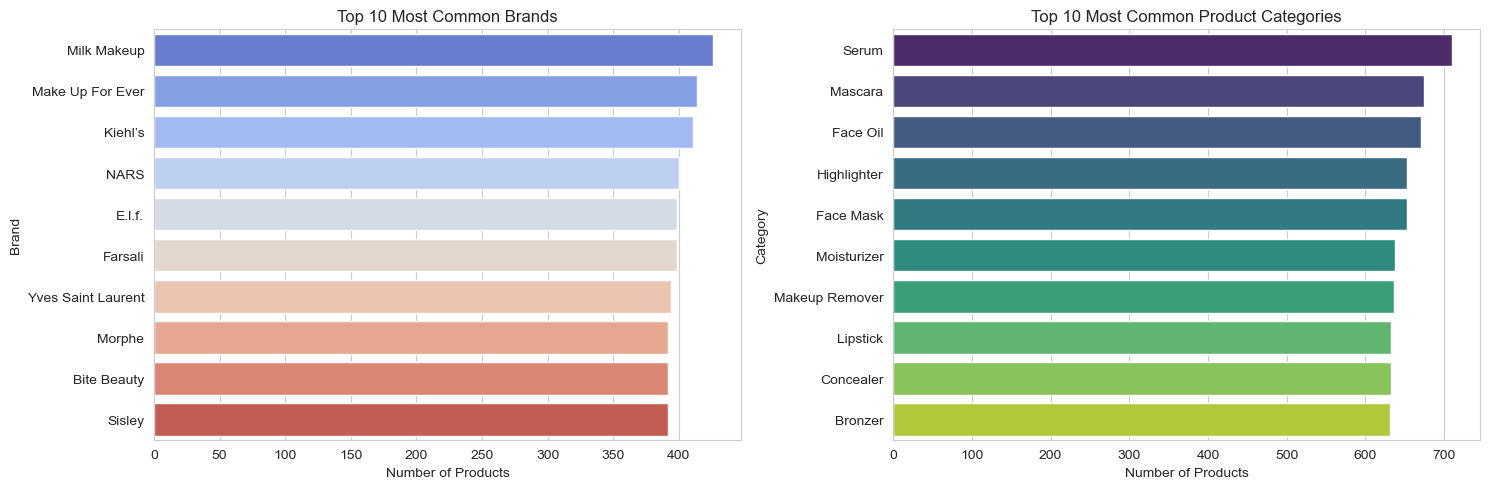

In [53]:
sns.set_style("whitegrid")

top_brands = beauty_df["brand"].value_counts().nlargest(10)

top_categories = beauty_df["category"].value_counts().nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm", ax=axes[0])
axes[0].set_title("Top 10 Most Common Brands")
axes[0].set_xlabel("Number of Products")
axes[0].set_ylabel("Brand")

sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", ax=axes[1])
axes[1].set_title("Top 10 Most Common Product Categories")
axes[1].set_xlabel("Number of Products")
axes[1].set_ylabel("Category")

plt.tight_layout()
plt.show()


## Brands with the Highest Average Ratings

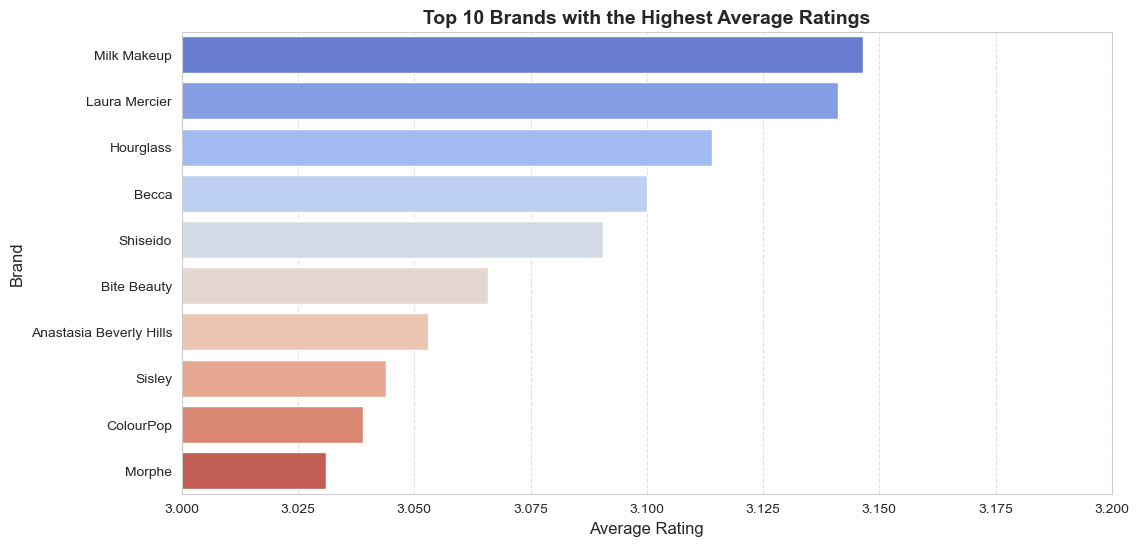

In [57]:
sns.set_style("whitegrid")

brand_ratings = beauty_df.groupby("brand")["rating"].mean()

top_brands = brand_ratings[beauty_df["brand"].value_counts() >= 5].nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm")

plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Top 10 Brands with the Highest Average Ratings", fontsize=14, fontweight="bold")

plt.xlim(3, 3.2)  

plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()





#### - All the brands listed have average ratings clustered between 3.000 to 3.200. This suggests that there isn't a drastic difference in customer satisfaction among these top brands, although they are slightly above average.
#### - Brands like Milk Makeup and Laura Mercier lead the pack, which indicates their strong reputation and customer satisfaction in the beauty and cosmetics market. These brands might be leveraging high product quality, effective marketing strategies, and strong brand loyalty.
#### - The presence of both high-end (e.g., Hourglass, Shiseido, Sisley) and more affordable brands (e.g., ColourPop, Morphe) in the top 10 suggests that consumers value quality and brand experience across different price points. It highlights the diverse preferences in the beauty market.

### Takeaways:
#### - Understanding that consumer preferences lean towards certain brands can help competitors identify areas for improvement, such as product quality, customer service, and marketing strategies.
#### - Brands with higher average ratings could be seen as more reliable and promising investments due to their positive consumer perception.
#### - Awareness of which brands are most highly rated can guide purchasing decisions, especially for new products or brands they haven't tried before.

## Dominant Product Categories in Different Price Ranges

C:\Users\pc\AppData\Local\Temp\ipykernel_10560\3467830888.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_category_counts = beauty_df.groupby(["Price_Range", "category"]).size().reset_index(name="Count")
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True t

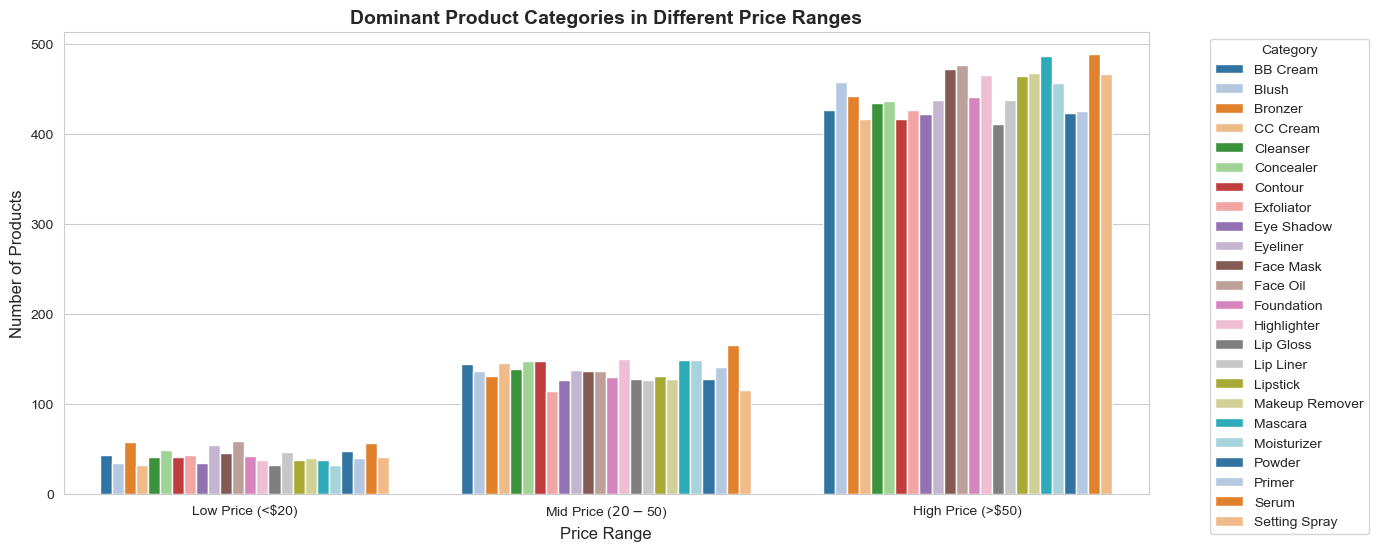

In [62]:
bins = [0, 20, 50, beauty_df["price_usd"].max()]
labels = ["Low Price (<$20)", "Mid Price ($20-$50)", "High Price (>$50)"]

beauty_df["Price_Range"] = pd.cut(beauty_df["price_usd"], bins=bins, labels=labels, include_lowest=True)

price_category_counts = beauty_df.groupby(["Price_Range", "category"]).size().reset_index(name="Count")

plt.figure(figsize=(14, 6))
sns.barplot(x="Price_Range", y="Count", hue="category", data=price_category_counts, palette="tab20")

plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.title("Dominant Product Categories in Different Price Ranges", fontsize=14, fontweight="bold")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


#### - The chart highlights the dominance of premium and mid-priced beauty products in the market, reflecting consumer preferences for higher-quality items. Brands can leverage these insights to tailor their product offerings and pricing strategies to meet market demands.

#  Competitor Analysis & Market Positioning

## Brand Positioning: Price vs. Rating

In [67]:
brand_analysis = beauty_df.groupby('brand').agg(
    avg_price=('price_usd', 'mean'),
    avg_rating=('rating', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
).reset_index()

top_reviewed_brands = brand_analysis.sort_values(by="total_reviews", ascending=False).head(10)


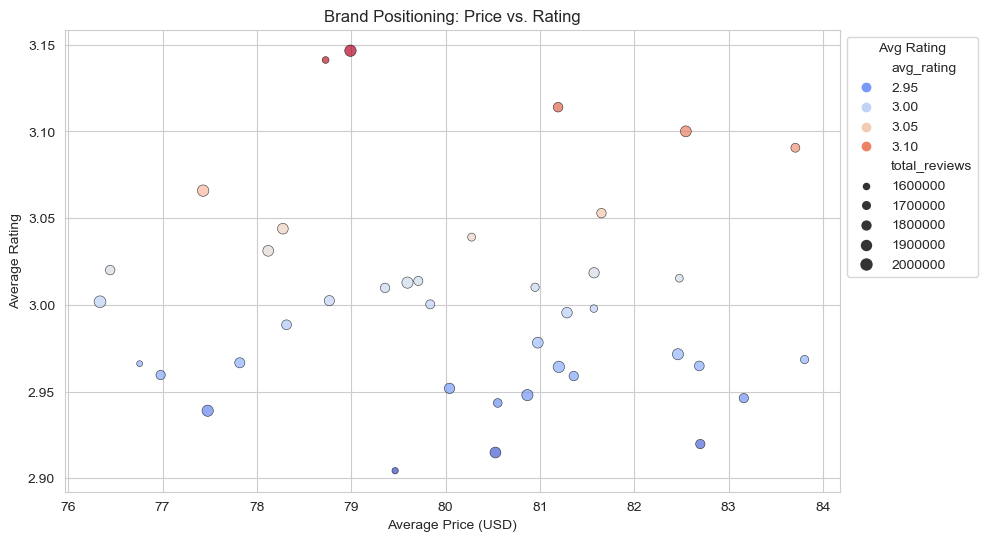

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_analysis, x='avg_price', y='avg_rating', size='total_reviews', hue='avg_rating', palette="coolwarm", alpha=0.7, edgecolor="black")

plt.xlabel("Average Price (USD)")
plt.ylabel("Average Rating")
plt.title("Brand Positioning: Price vs. Rating")
plt.legend(title="Avg Rating", bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


#### - Brands with higher prices do not necessarily have higher ratings. The scatter plot shows a mix of ratings across different price ranges.
#### - A few brands stand out with higher ratings, regardless of their price range, indicating strong customer loyalty and satisfaction.
#### - Larger data points (representing a higher number of reviews) are distributed across the plot, indicating that brands with more reviews span a wide range of prices and ratings.
#### - Brands with a higher number of reviews might have more visibility and customer engagement, but this does not directly correlate with higher ratings.
#### _ 

## Top 10 Most Reviewed Brands

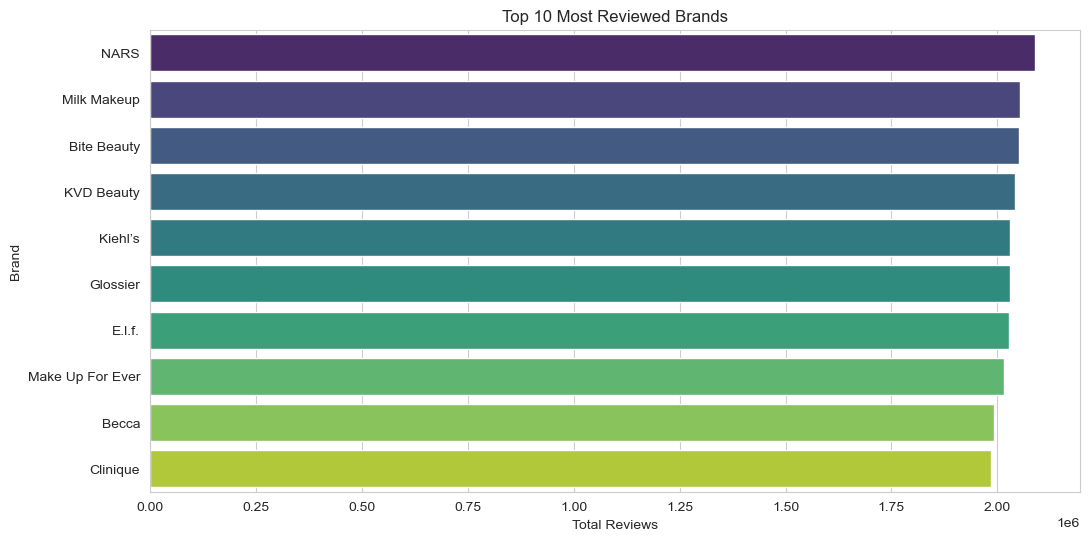

In [72]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_reviewed_brands, y="brand", x="total_reviews", palette="viridis")

plt.xlabel("Total Reviews")
plt.ylabel("Brand")
plt.title("Top 10 Most Reviewed Brands")
plt.show()


## Price Distribution by Brand

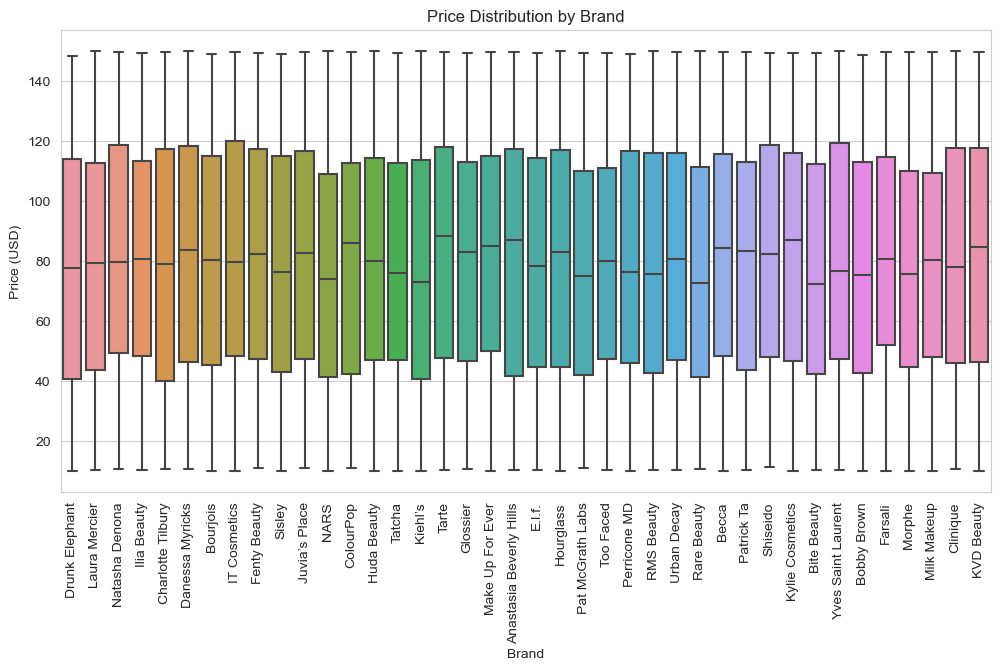

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=beauty_df, x="brand", y="price_usd", showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Price (USD)")
plt.title("Price Distribution by Brand")
plt.show()


#### - The chart reveals significant variability in the pricing of beauty and cosmetics products across different brands. Some brands, like Pat McGrath Labs and Dior, exhibit a wide range of prices with notable higher-priced outliers, indicating a premium pricing strategy. Others, like Laura Mercier, show a more consistent price range, focusing on mid-to-high-end products. This analysis highlights the diverse pricing strategies employed by various brands, providing valuable insights for consumers making purchasing decisions.



In [76]:
# Define rating categories
def categorize_rating(rating):
    if rating >= 4:
        return 'High-rated'
    elif 3 <= rating < 4:
        return 'Average-rated'
    else:
        return 'Low-rated'

# Apply function to create a new column
beauty_df['rating_category'] = beauty_df['rating'].apply(categorize_rating)

# Check category distribution
beauty_df['rating_category'].value_counts()


rating_category
Low-rated        7354
High-rated       4070
Average-rated    3576
Name: count, dtype: int64

#### - The majority of products are Low-rated, followed by High-rated, and then Average-rated.

## common ingredients in high-rated vs. low-rated products.

In [81]:
from collections import Counter

high_rated_ingredients = Counter(" ".join(beauty_df[beauty_df['rating_category'] == 'High-rated']['main_ingredient']).split())
low_rated_ingredients = Counter(" ".join(beauty_df[beauty_df['rating_category'] == 'Low-rated']['main_ingredient']).split())

high_ingredients_df = pd.DataFrame(high_rated_ingredients.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False).head(10)
low_ingredients_df = pd.DataFrame(low_rated_ingredients.items(), columns=['Ingredient', 'Count']).sort_values(by='Count', ascending=False).head(10)


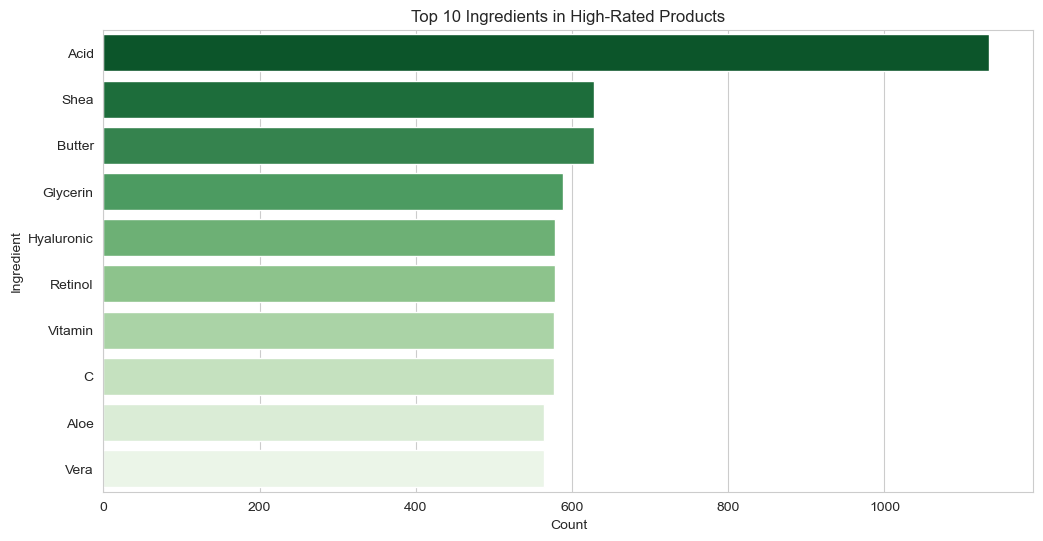

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=high_ingredients_df, y='Ingredient', x='Count', palette='Greens_r')
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Ingredients in High-Rated Products")
plt.show()


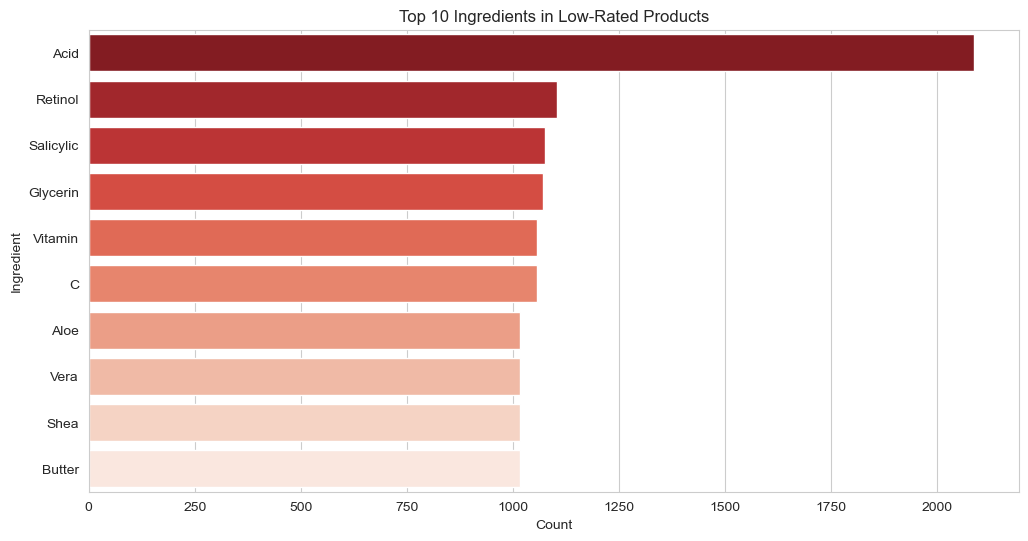

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(data=low_ingredients_df, y='Ingredient', x='Count', palette='Reds_r')
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 10 Ingredients in Low-Rated Products")
plt.show()


#### - The data suggests that while acids are common across both product categories, their concentration and specific types differ significantly. High-rated products tend to favor moisturizing and nourishing ingredients like Shea, Butter, and Hyaluronic acid, while low-rated products more frequently contain stronger acids like Salicylic. This may indicate that gentler formulations with balanced moisturizing properties are more appreciated by consumers than products with higher acid concentrations. Manufacturers should consider reformulating low-rated products to better match the ingredient profiles of successful products, particularly by increasing moisturizing components and potentially reducing acid concentrations.

# Pricing Strategy & Market Trends

## Price vs. Packaging Size: Do Bigger Products Have Better Value?

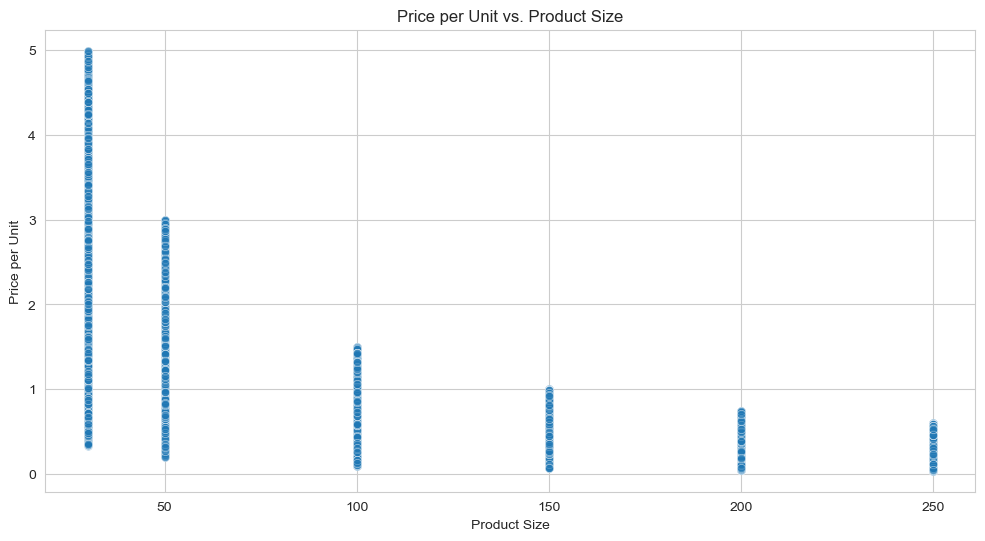

In [88]:
beauty_df['price_per_unit'] = beauty_df['price_usd'] / beauty_df['product_size_num']

plt.figure(figsize=(12, 6))
sns.scatterplot(data=beauty_df, x='product_size_num', y='price_per_unit', alpha=0.6)
plt.xlabel("Product Size")
plt.ylabel("Price per Unit")
plt.title("Price per Unit vs. Product Size")
plt.show()


#### - The graph shows a clear negative correlation between product size and price per unit. Key observations:

####    1.Smallest products (around size 25): Have the highest price variation, ranging from approximately 0.3 dollars to 5.0 dollars  per unit, with many products clustered at the higher end
####    2.Small-medium products (around size 50): Show a reduced price range, with maximum prices around 3.0 dollars per unit
####    3.Medium products (around size 100): Further reduction in price per unit, with maximum values around 1.5 dollars. 
####    4.Large products (sizes 150-200): Continue the downward trend, with most prices under 1.0 dollars per unit
####    5.Largest products (around size 250): Consistently show the lowest price per unit, generally below 0.6 dollars.

#### - The data clearly demonstrates that larger beauty and cosmetics products do indeed offer better value for money, confirming the "bulk discount" effect. For consumers seeking cost efficiency, purchasing larger sizes provides significant savings per unit. Smaller packaging commands a substantial premium, often 5-8 times more expensive per unit than the largest sizes. This information is valuable for both cost-conscious consumers making purchasing decisions and for marketers determining optimal pricing strategies across different product sizes. The consistency of this pattern across the dataset suggests this is a standard industry pricing approach rather than isolated to specific product categories.

## Price vs. Gender Target

C:\Users\pc\AppData\Local\Temp\ipykernel_10560\3205744218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_price_df = beauty_df.groupby('gender_target')['price_usd'].mean().reset_index()
C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


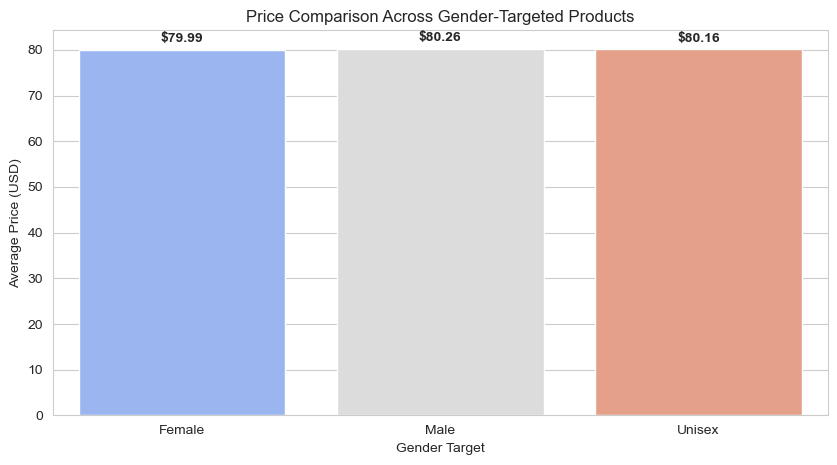

In [92]:
gender_price_df = beauty_df.groupby('gender_target')['price_usd'].mean().reset_index()

plt.figure(figsize=(10, 5))
bars = sns.barplot(data=gender_price_df, x='gender_target', y='price_usd', palette='coolwarm')

# Add value labels on top of each bar
for i, bar in enumerate(bars.patches):
    bars.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 1,  # Position slightly above the bar
        f'${bar.get_height():.2f}',  # Format as currency with 2 decimal places
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel("Gender Target")
plt.ylabel("Average Price (USD)")
plt.title("Price Comparison Across Gender-Targeted Products")
plt.show()

#### - The pricing across all three gender categories is remarkably similar, with less than a dollar difference between them.
#### - Male-targeted products have the highest average price, though only marginally (10¢ higher than unisex products and 27¢ higher than female-targeted products).
#### - Contrary to what might be expected based on the "pink tax" concept (where products marketed to women often cost more), female-targeted products actually have the lowest average price in this dataset, though the difference is minimal.
#### - The data suggests price parity across gender-targeted beauty and cosmetics products, with virtually identical average pricing regardless of the intended gender audience. This indicates that in this particular market segment, pricing strategies appear to be consistent across gender categories, and there is no significant price discrimination based on the gender target of the products. 

## Price vs. Country of Origin: Which Countries Produce Premium vs. Budget Products?

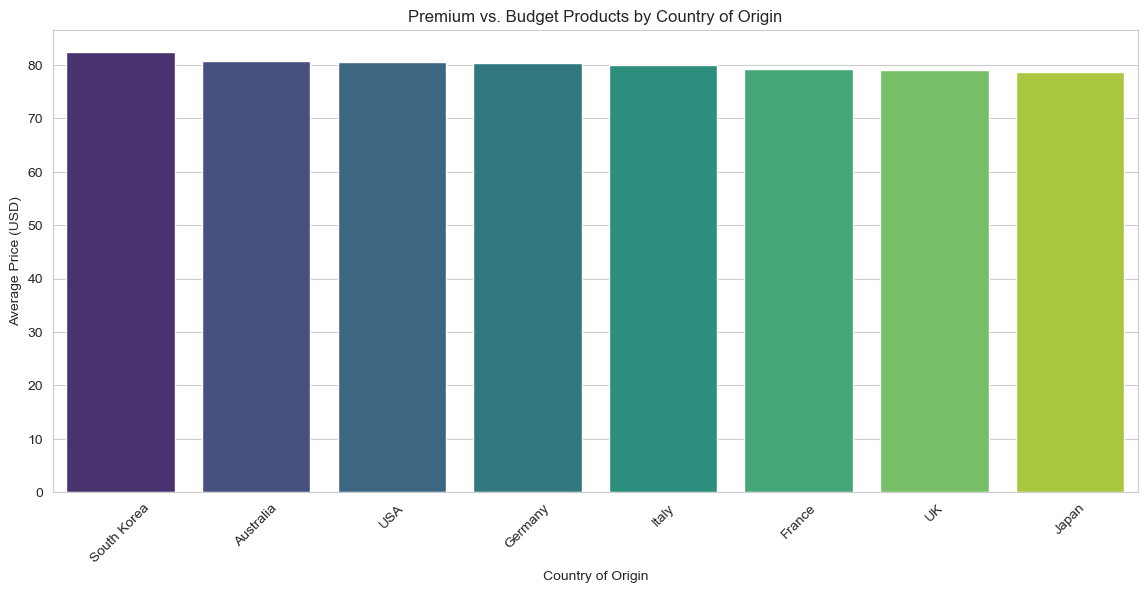

In [96]:
country_price_df = beauty_df.groupby('country_of_origin')['price_usd'].mean().reset_index().sort_values(by='price_usd', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(data=country_price_df, x='country_of_origin', y='price_usd', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Country of Origin")
plt.ylabel("Average Price (USD)")
plt.title("Premium vs. Budget Products by Country of Origin")
plt.show()


#### - The analysis reveals a modest price hierarchy in beauty and cosmetic products based on country of origin, with South Korean products commanding the highest premium, followed by Australian and American products. However, the narrow price range (only about $3-4 difference between highest and lowest) suggests that country of origin has a statistically significant but practically modest impact on product pricing in the global beauty market.
#### - This finding challenges the common consumer perception that products from certain countries (like France or Japan) might carry substantially higher premiums. Instead, the data indicates a relatively globalized pricing strategy across major beauty-producing nations. For industry stakeholders, this suggests that marketing based on country of origin might focus more effectively on perceived quality differences or unique ingredients rather than attempting to justify significant price disparities. The slight premium for South Korean products likely reflects the global popularity of K-beauty trends in recent years.

# Product Category Demand & Usage Frequency

## Daily vs. Weekly vs. Monthly Usage Products

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


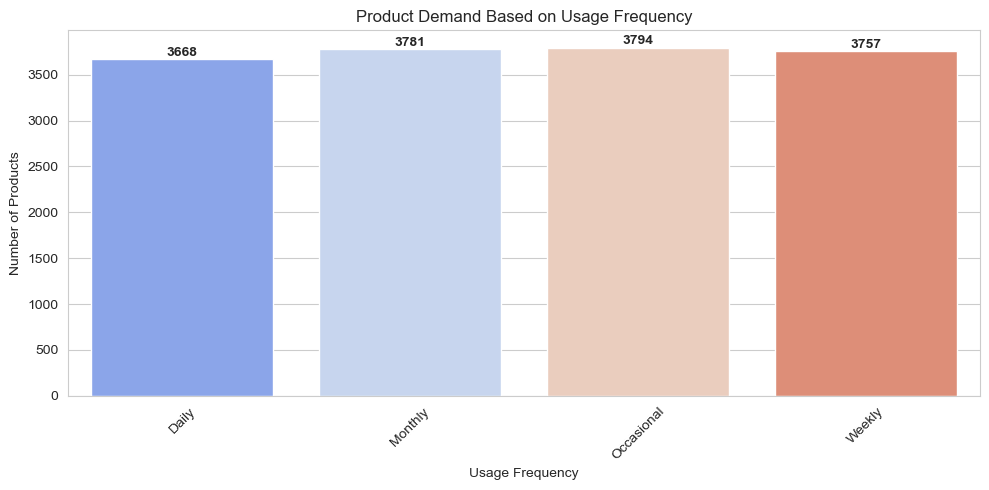

In [103]:
usage_counts = beauty_df['usage_frequency'].value_counts().reset_index()
usage_counts.columns = ['usage_frequency', 'count']

plt.figure(figsize=(10, 5))
bars = sns.barplot(data=usage_counts, x='usage_frequency', y='count', palette='coolwarm')

# Add value labels on top of each bar
for i, bar in enumerate(bars.patches):
    bars.text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 5,  # Position slightly above the bar
        f'{int(bar.get_height())}',  # Format as integer
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel("Usage Frequency")
plt.ylabel("Number of Products")
plt.title("Product Demand Based on Usage Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

#### - The data reveals a highly balanced distribution of beauty and cosmetics products across all usage frequency categories, indicating that the market caters equally to consumers regardless of how frequently they use products. This balanced approach suggests that manufacturers recognize the importance of serving diverse consumer needs and usage patterns, from daily essentials to occasional special-use items. The minimal variation between categories (less than 3.5% difference between highest and lowest) reflects a mature market that has developed comprehensive product offerings across the full spectrum of usage frequencies.

##  Skincare vs. Makeup Market Share

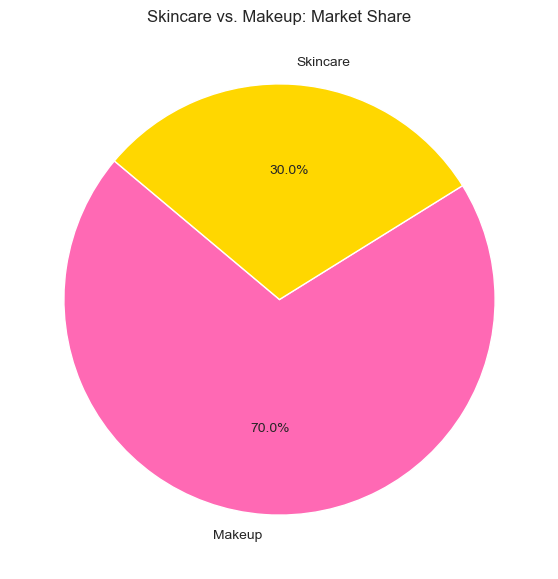

<function matplotlib.pyplot.show(close=None, block=None)>

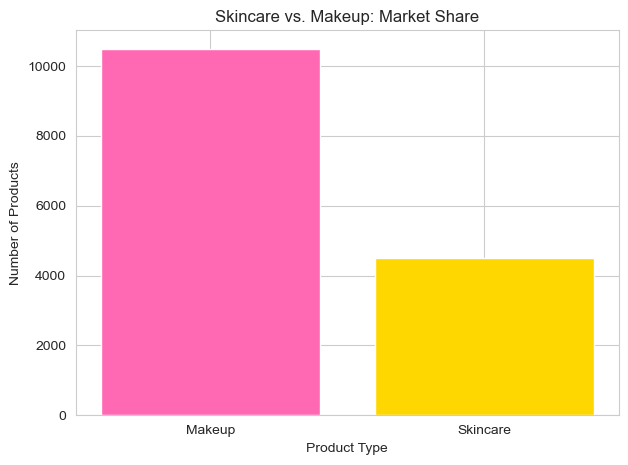

In [108]:
skincare_categories = ['Makeup Remover', 'Face Mask', 'Cleanser', 'Face Oil', 
                       'Serum', 'Exfoliator', 'Moisturizer']
makeup_categories = ['Blush', 'Highlighter', 'Foundation', 'Powder', 'Lip Gloss',
                     'CC Cream', 'Eye Shadow', 'Concealer', 'Eyeliner', 'Lipstick',
                     'Setting Spray', 'Bronzer', 'Primer', 'Contour', 'Mascara',
                     'BB Cream', 'Lip Liner']

beauty_df['product_type'] = beauty_df['category'].apply(lambda x: 'Skincare' if x in skincare_categories else 'Makeup')

type_counts = beauty_df['product_type'].value_counts()

plt.figure(figsize=(7, 7))
colors = ['#FF69B4', '#FFD700']  
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Skincare vs. Makeup: Market Share")
plt.show()

plt.figure(figsize=(7, 5))
colors = ['#FF69B4', '#FFD700']  
plt.bar(type_counts.index, type_counts.values, color=colors)

plt.xlabel("Product Type")
plt.ylabel("Number of Products")
plt.title("Skincare vs. Makeup: Market Share")
plt.xticks(rotation=0)  
plt.show


#### - The visualizations indicate that makeup products dominate the beauty market with a 70.0% share and a significantly higher number of products compared to skincare, which holds a 30.0% share. This suggests that makeup products are more prevalent and possibly more in demand than skincare products in the market. Brands and businesses should consider focusing on makeup product lines to capture a larger share of the beauty market while also exploring opportunities to differentiate their skincare offerings.

#  Target Market & Consumer Preferences

## Most Common Skin Types in the Market

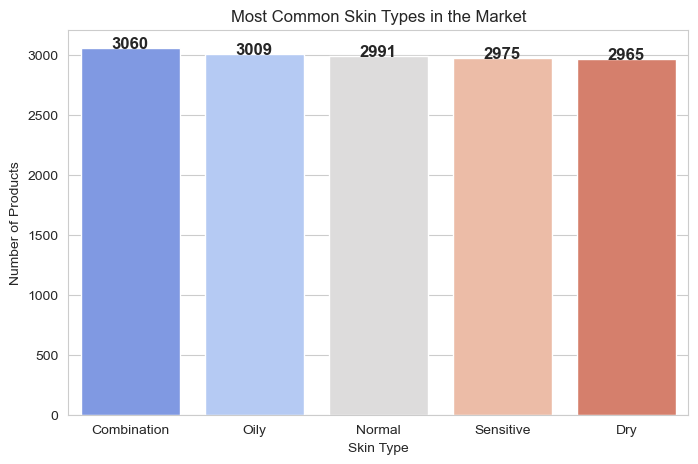

In [113]:
skin_type_counts = beauty_df['skin_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=skin_type_counts.index, y=skin_type_counts.values, palette="coolwarm")
plt.xlabel("Skin Type")
plt.ylabel("Number of Products")
plt.title("Most Common Skin Types in the Market")

for i, v in enumerate(skin_type_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()


#### - The beauty and cosmetics market demonstrates a balanced approach to serving different skin types, with a slight preference for products targeting combination and oily skin. This distribution likely reflects both consumer demand and industry recognition of the prevalence of various skin conditions. The minimal variation between categories suggests that manufacturers have developed comprehensive product lines addressing the needs of consumers across the spectrum of skin types. For beauty brands looking to enter or expand in this market, the data indicates that while all skin types are well-served, there may be slightly higher demand or opportunity in the combination and oily skin segments.

## Beauty Product Market Segmentation by Gender

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


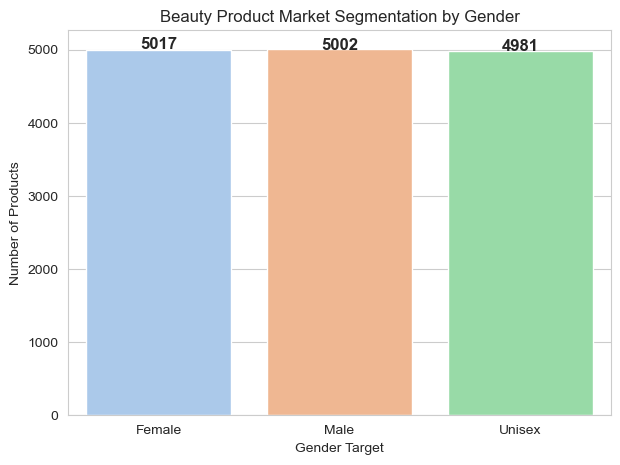

In [116]:
gender_counts = beauty_df['gender_target'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")
plt.xlabel("Gender Target")
plt.ylabel("Number of Products")
plt.title("Beauty Product Market Segmentation by Gender")

for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold')

plt.show()



#### - The beauty and cosmetics market demonstrates a notably equitable distribution of products across gender categories, challenging traditional perceptions that the industry primarily caters to female consumers. This balanced representation suggests that manufacturers have recognized and responded to the growing demand from male consumers and those seeking gender-neutral options. The near-equal product counts across all three categories indicate a mature, inclusive market that has evolved beyond gender-based marketing limitations. This even distribution also reflects changing consumer attitudes and preferences, with beauty and personal care increasingly viewed as universal rather than gender-specific. Brands entering this market should consider that all gender segments appear equally viable in terms of product representation and market opportunity.

# Cruelty-Free & Sustainable Beauty Trends

## Average Rating: Cruelty-Free vs. Non-Cruelty-Free Products

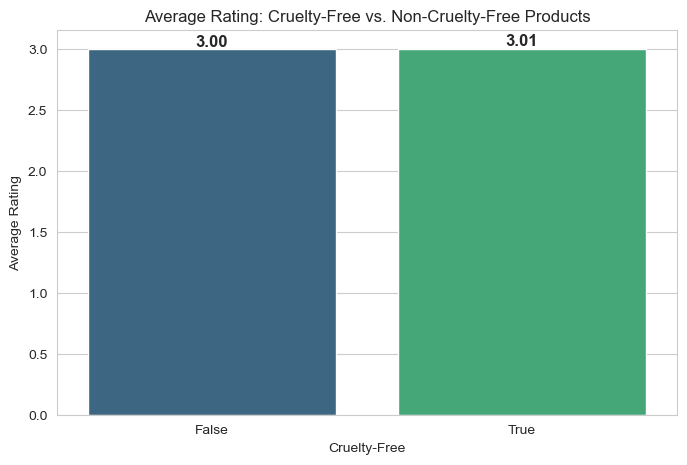

In [133]:
cruelty_free_rating = beauty_df.groupby('cruelty_free')['rating'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=cruelty_free_rating, x='cruelty_free', y='rating', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Cruelty-Free")
plt.ylabel("Average Rating")
plt.title("Average Rating: Cruelty-Free vs. Non-Cruelty-Free Products")

plt.show()


#### - The chart indicates that there is a very slight difference in average ratings between cruelty-free and non-cruelty-free products, with cruelty-free products having a marginally higher average rating. This suggests that consumers rate cruelty-free products slightly better than non-cruelty-free products, but the difference is minimal.

## Price Comparison

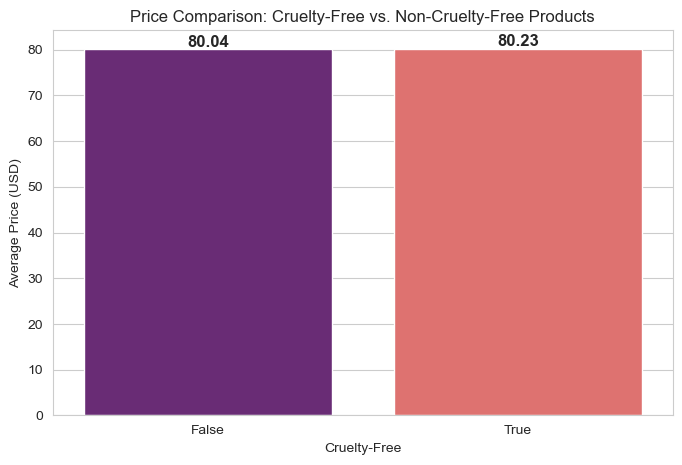

In [136]:
cruelty_free_price = beauty_df.groupby('cruelty_free')['price_usd'].mean().reset_index()

plt.figure(figsize=(8, 5))
ax = sns.barplot(data=cruelty_free_price, x='cruelty_free', y='price_usd', palette='magma')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Cruelty-Free")
plt.ylabel("Average Price (USD)")
plt.title("Price Comparison: Cruelty-Free vs. Non-Cruelty-Free Products")

plt.show()


#### - The chart indicates that there is a minimal difference in the average prices of cruelty-free and non-cruelty-free beauty and cosmetic products, with cruelty-free products being slightly more expensive by $0.19 on average. This suggests that choosing cruelty-free options does not significantly impact the cost for consumers.

## Top 10 Brands with the Most Cruelty-Free Products

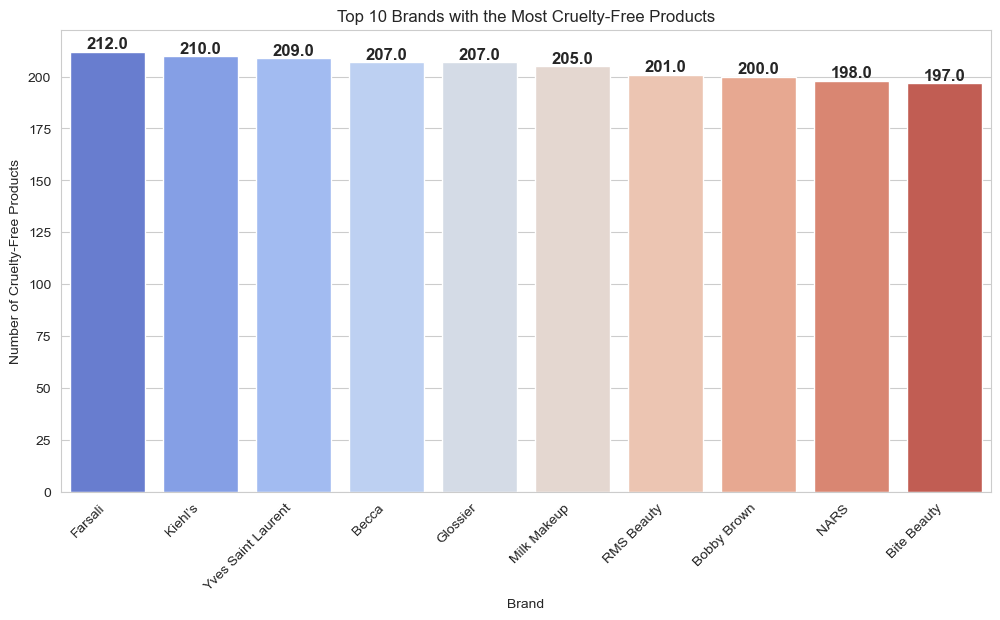

In [151]:
cruelty_free_brands = beauty_df[beauty_df['cruelty_free'] == True] \
    .groupby('brand').size().reset_index(name='count')

top_cruelty_free_brands = cruelty_free_brands.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_cruelty_free_brands, x='brand', y='count', palette='coolwarm')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Brand")
plt.ylabel("Number of Cruelty-Free Products")
plt.title("Top 10 Brands with the Most Cruelty-Free Products")

plt.show()


#### - The data reveals a robust commitment to cruelty-free products among leading beauty brands, with minimal differentiation in the number of cruelty-free offerings between the top competitors. This indicates that ethical product development has become a standard practice among industry leaders rather than a distinguishing factor. The strong representation of both specialty ethical brands and traditional luxury names suggests that cruelty-free formulations have become mainstream across all beauty market segments. For consumers prioritizing cruelty-free products, this data shows they have substantial options across different brands and likely across various price points, with several established prestige brands demonstrating significant commitment to cruelty-free product development.

## Top 10 Brands with the Most non_cruelty_free_brands

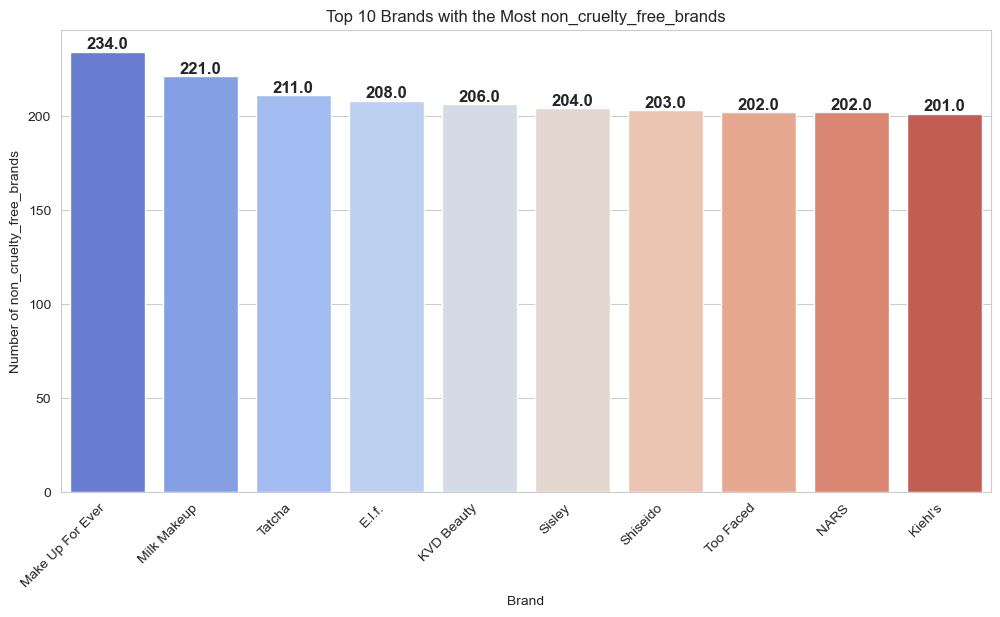

In [153]:
non_cruelty_free_brands = beauty_df[beauty_df['cruelty_free'] == False] \
    .groupby('brand').size().reset_index(name='count')

# Sort in descending order
top_non_cruelty_free_brands = non_cruelty_free_brands.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_non_cruelty_free_brands, x='brand', y='count', palette='coolwarm')

plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Brand")
plt.ylabel("Number of non_cruelty_free_brands")
plt.title("Top 10 Brands with the Most non_cruelty_free_brands")

plt.show()

#### - The presence of well-known brands such as Make Up For Ever, Milk Makeup, and NARS in the top 10 non-cruelty-free brands indicates that a significant portion of the beauty industry still relies on non-cruelty-free production methods. Despite growing consumer demand for ethical beauty products, these brands continue to produce a large number of items that do not meet cruelty-free standards. This highlights an opportunity for these companies to reconsider their animal testing policies and shift towards more ethical and sustainable practices to align with the changing preferences of modern consumers.

####  Conclusive statement on cruelty free & non cruelty free:
#### - The presence of Milk Makeup, NARS, and Kiehl’s in both lists suggests that these brands have a mixed product portfolio, meaning they cater to both cruelty-free and non-cruelty-free markets. This could indicate that they are either in transition towards more ethical production or maintaining both product types to serve different consumer preferences.
#### - Brands aiming to attract ethically conscious consumers might need to clarify their stance and potentially phase out non-cruelty-free products to strengthen their cruelty-free image.

# Final Summary
#### This study provides key insights into pricing strategies, product distribution, ethical considerations, and consumer preferences in the beauty and cosmetics industry.

#### The analysis confirms the "bulk discount" effect, where larger product sizes offer significant cost savings per unit, making them a more economical choice for consumers. Interestingly, the data challenges common assumptions such as the "pink tax", revealing no significant gender-based pricing differences. Additionally, while certain countries like South Korea command a slight premium due to the global popularity of K-beauty, overall pricing remains relatively uniform across regions.

#### Market composition analysis indicates that makeup dominates over skincare, holding a 70% share, suggesting stronger consumer demand for makeup products. Similarly, the industry appears to cater equitably to different skin types, with a slight preference for combination and oily skin products. Additionally, the near-equal distribution of products across all gender categories reflects an evolving market that embraces inclusivity and challenges traditional gender-based beauty norms.

#### Regarding ethical considerations, the study finds minimal price differences between cruelty-free and non-cruelty-free products, suggesting that consumers do not face significant cost barriers when choosing ethical beauty products. However, despite growing consumer demand for cruelty-free alternatives, several leading brands continue to produce a high number of non-cruelty-free products, highlighting an opportunity for these companies to transition toward more ethical and sustainable practices.

#### Overall, this research underscores the evolving nature of the beauty industry, where affordability, inclusivity, and ethical considerations are shaping modern market trends. Brands looking to stay competitive should prioritize cost-effective packaging, expand cruelty-free product lines, and align with shifting consumer preferences to maintain relevance in an increasingly conscious and diversified market.